In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import font_manager


Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv("result_preprocessing - raw.csv", header = 1)
data_summary = data.drop(data.columns[5:], axis = 1)
print(data_summary.columns)
data_summary.head()


Index(['Score', 'Group', 'ID', 'Preference', 'Family Size'], dtype='object')


,Score,Group,ID,Preference,Family Size
0,20.000,Control,100012.0,Working in silence,4.0
1,24.400,Control,100095.0,Working in silence,4.0
2,25.000,Control,152356.0,Working in silence,3.0
3,20.875,Treatment,100039.0,Working in silence,4.0
4,21.875,Treatment,15552527.0,Working in silence,3.0


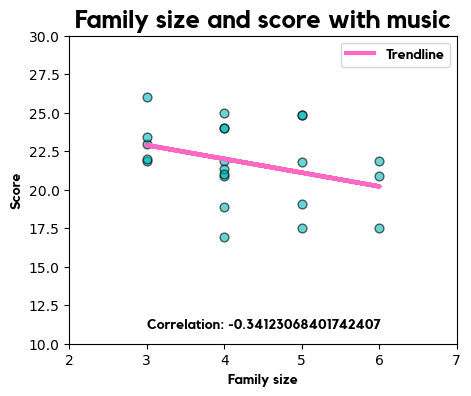

In [14]:
#Scatter plot for family size and preference
# we are analysing to see if a higher family size has an effect on score if put in a noisy environment

data["Preference"].describe() # Count 50, Silence 37, Music 13
t = data[(data["Group" ]== "Treatment")]
t  = t[~((t['Family Size'] < 3) | (t['Score'] < 15))]
c = data[(data["Group" ]!= "Treatment")]


path = "Kollektif-Bold.ttf"
font = font_manager.FontProperties(fname = path)

#Plotting a scatter plot 
slope, intercept = np.polyfit(t["Family Size"],t["Score"], 1)
plt.figure(figsize=(5, 4))
plt.ylim([10, 30])
plt.xlim([2, 7])

plt.scatter(t["Family Size"],t["Score"],c = "#00baba", s=40,alpha=0.6,edgecolors='black',linewidths=1.0 )


plt.plot(t["Family Size"],  slope * t["Family Size"] + intercept, color='#ff69c4',  label = "Trendline",linewidth=3.0)

correlation = t['Family Size'].corr(t['Score'])


plt.text(3, 11, f"Correlation: {correlation}", fontsize=10, fontproperties=font, color='black',)
plt.title("Family size and score with music", fontproperties=font,fontsize=18)
plt.xlabel("Family size", fontproperties=font)
plt.ylabel("Score", fontproperties=font)


plt.legend(prop=font)

plt.savefig('scatter.png', dpi=300, bbox_inches='tight')  # save as PNG with high res


# plt.style.use('ggplot')
plt.show()


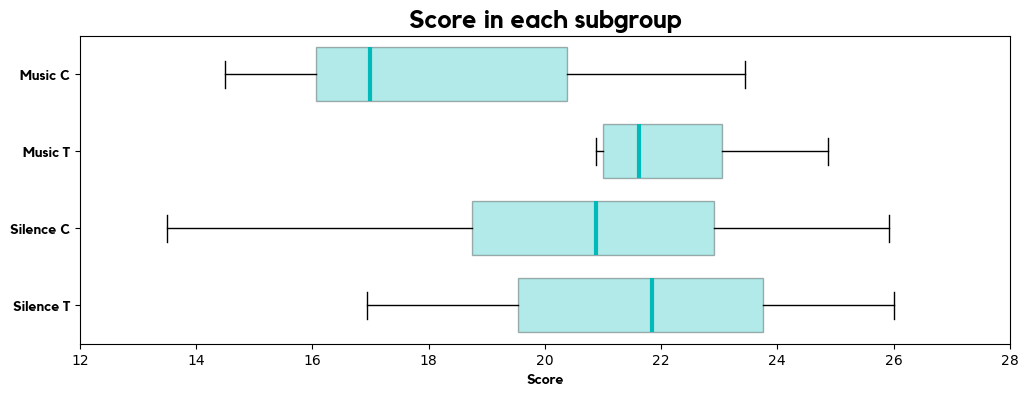

In [15]:
#Boxplot for treatment or control, and preference

silence_t = data[(data["Preference" ]== "Working in silence") & (data["Group" ]== "Treatment")]
silence_c = data[(data["Preference" ]== "Working in silence") & (data["Group" ]!= "Treatment")]
music_t = data[(data["Preference" ]!= "Working in silence") & (data["Group" ]== "Treatment")]
music_c = data[(data["Preference" ]!= "Working in silence") & (data["Group" ]== "Control")]

font = font_manager.FontProperties(fname = path)
plt.figure(figsize=(12, 4))
plt.boxplot([
    silence_t["Score"],
    silence_c["Score"],
    music_t["Score"],
    music_c["Score"]],vert=False,
    bootstrap = 1000,
            widths = 0.7,
            meanline = True,
            patch_artist=True,    # Needed to fill boxes with colour
            boxprops=dict(facecolor='#00baba',alpha=0.3),
            medianprops=dict(color='#00baba',   linewidth=3),

    
    )

plt.xlim([12, 28])

plt.yticks([1, 2, 3,4], ["Silence T",  "Silence C", "Music T", "Music C"], fontproperties=font,fontsize=10 )  # Optional: label x-axis
plt.title('Score in each subgroup', fontproperties=font,fontsize=18)
plt.xlabel('Score', fontproperties=font,fontsize=10)

plt.savefig('boxplot_scores.png', dpi=300, bbox_inches='tight')  # save as PNG with high res

plt.show()

